# Let's play

In [ ]:
import random
import numpy as np

from environment import fruit_collection

fruit_collection.test('mini', True, True, False, rng=np.random.RandomState(random.randint(0, 10000)))

# Fit Agent

In [1]:
from environment import fruit_collection

from tabular import ai
from tabular import experiment

env = fruit_collection.FruitCollectionMini(
    rendering=False, lives=1, game_length=300, image_saving=False)

agent = ai.SarsaAgent(
        alpha=0.01,
        epsilon=0.95,
        gamma=0.99,
        legal_actions=[0, 1, 2, 3],
        strategy='mean'
    )

agent, reward_data = experiment.train(env, agent, max_gamestep=300, num_games=20000, verbose=True)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
# game 0 mean reward = -4.00 std reward = 6.00
# game 100 mean reward = -5.09 std reward = 5.15
# game 200 mean reward = -5.12 std reward = 5.33
# game 300 mean reward = -5.81 std reward = 5.05
# game 400 mean reward = -4.86 std reward = 5.24
# game 500 mean reward = -4.84 std reward = 5.28
# game 600 mean reward = -4.69 std reward = 5.08
# game 700 mean reward = -4.69 std reward = 5.28
# game 800 mean reward = -5.83 std reward = 4.99
# game 900 mean reward = -4.62 std reward = 5.27
# game 1000 mean reward = -5.60 std reward = 5.04
# game 1100 mean reward = -4.01 std reward = 5.25
# game 1200 mean reward = -4.42 std reward = 5.25
# game 1300 mean reward = -4.98 std reward = 5.31
# game 1400 mean reward = -4.66 std reward = 5.34
# game 1500 mean reward = -4.72 std reward = 5.23
# game 1600 mean reward = -4.34 std reward = 5.28
# game 1700 mean reward = -4.99 std reward = 5.30
# game 1800 mean reward = -

# game 16300 mean reward = 1.97 std reward = 0.22
# game 16400 mean reward = 1.99 std reward = 0.10
# game 16500 mean reward = 1.83 std reward = 1.22
# game 16600 mean reward = 1.87 std reward = 1.11
# game 16700 mean reward = 1.98 std reward = 0.20
# game 16800 mean reward = 1.99 std reward = 0.10
# game 16900 mean reward = 1.94 std reward = 0.31
# game 17000 mean reward = 2.00 std reward = 0.00
# game 17100 mean reward = 1.88 std reward = 1.19
# game 17200 mean reward = 1.86 std reward = 1.11
# game 17300 mean reward = 1.99 std reward = 0.10
# game 17400 mean reward = 1.98 std reward = 0.20
# game 17500 mean reward = 1.86 std reward = 1.11
# game 17600 mean reward = 1.73 std reward = 1.63
# game 17700 mean reward = 1.98 std reward = 0.20
# game 17800 mean reward = 1.81 std reward = 1.24
# game 17900 mean reward = 1.84 std reward = 1.13
# game 18000 mean reward = 2.00 std reward = 0.00
# game 18100 mean reward = 1.64 std reward = 1.99
# game 18200 mean reward = 1.98 std reward = 0.20


# Plot Reward

In [3]:
import pandas as pd

df_reward = pd.Series(reward_data).to_frame()
df_reward.columns = ['reward']
df_reward['# game'] = ((df_reward.index.map(int) // 100 + 1) * 100).values
df_reward.tail()

,reward,# game
19995,2.0,20000
19996,2.0,20000
19997,2.0,20000
19998,2.0,20000
19999,2.0,20000


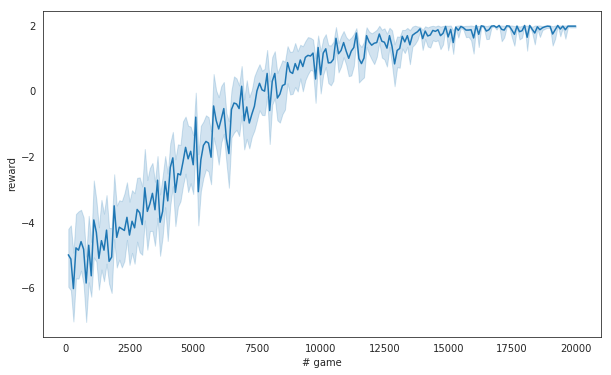

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=df_reward, x='# game', y='reward', n_boot=100, ax=ax)
plt.show()

# save agent

In [5]:
import pickle

with open("agent.pkl", 'wb') as f:
    pickle.dump(agent, f, pickle.HIGHEST_PROTOCOL)

# load agent

In [ ]:
import pickle

with open('agent.pkl', 'rb') as f:
    agent = pickle.load(f)

# test agent

In [7]:
import random
import numpy as np

from environment import fruit_collection

fruit_collection.test_agent('mini', True, True, False, agent, np.random.RandomState(random.randint(0, 10000)))